Jan Czechowicz, s5767512


# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [39]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for data visualisation
from matplotlib import pyplot as plt # used for plotting
import pylab # used for plotting and visualizing data
import pingouin as pg  # used for statistical operations

# Load the DataFrame as 'df_mh' variable
df_mh = pd.read_csv('MillerHadenData.csv')


In [40]:
# Q1a (code):
# Display first few rows of the dataframe
df_mh.head()


,Participant,Abil,IQ,Home,TV
0,1,61,107,144,487
1,2,56,109,123,608
2,3,45,81,108,640
3,4,66,100,155,493
4,5,49,92,103,636


Answer to 1a: In the provided dataframe there are three different types of data. 'Participant' column is nominal data, 'Abil' and 'IQ' are an example of interval data while the rest columns ('Home', 'TV') are ratio data. 

In [41]:
# Check data types and information
df_mh.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [42]:
# Q1b (code):
# Check for missing values
df_mh.isnull()
# Conclusion: There are no missing values in this dataframe.

,Participant,Abil,IQ,Home,TV
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [43]:
# Check whether there is a data point for each participant on both variables
df_mh.info()
# Conclusion: Using 'info' method we can see that there are no 'zero' data points in this DataFrame and that there are data points for each of the 25 parcicipants of the study.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


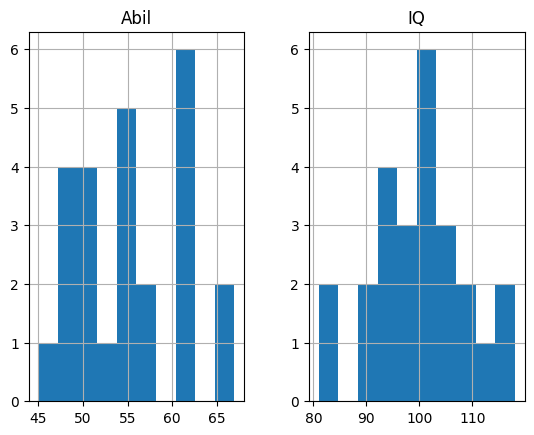

In [44]:
# Q1c (code):
# Check data distribution
df_mh[['Abil', 'IQ']].hist()
plt.show()


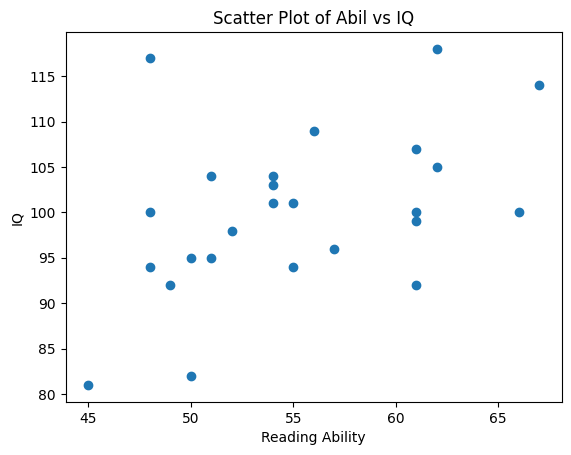

In [45]:
# Q1d (code):
# Scatter plot
plt.scatter(df_mh['Abil'], df_mh['IQ'])
plt.title('Scatter Plot of Abil vs IQ')
plt.xlabel('Reading Ability')
plt.ylabel('IQ')
plt.show()


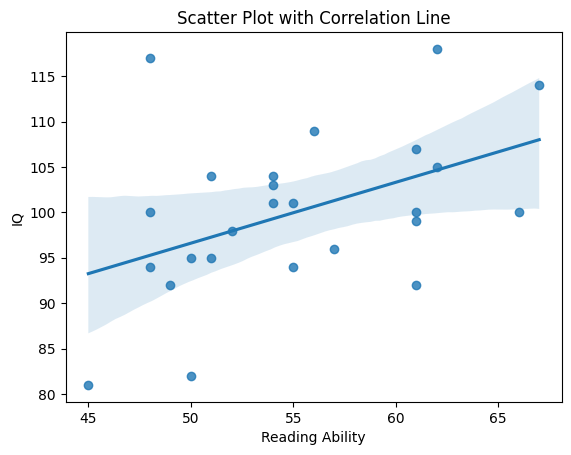

In [46]:
# Q1e (code):
# Correlation line
sns.regplot(x='Abil', y='IQ', data=df_mh)
plt.title('Scatter Plot with Correlation Line')
plt.xlabel('Reading Ability')
plt.ylabel('IQ')
plt.show()


**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

### Q2a (answer with words):
In this case, the relationship between 'Abil' and 'IQ' is linear and the data is approximately normally distributed, therefore Pearson correlation coefficient test will be suitable.

In [47]:
# Q2b (code):
# Calculate Pearson correlation coefficient and p-value
pg.corr(df_mh['Abil'], df_mh['IQ'], method='pearson')


,n,r,CI95%,p-val,BF10,power
pearson,25,0.45117,"[0.07, 0.72]",0.023593,2.804,0.640299


### Q2c (answer with words):
Conclusion: In terms of direction, the positive value of the correlation coefficient (r = 0.45117) indicates a positive linear relationship between 'Abil' and 'IQ'. As one variable increases, the other tends to increase as well. The strength of the association is moderate. The correlation coefficient is between 0.3 and 0.5, suggesting a noticeable but not very strong linear relationship.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

# Q3a (answer in words):
*H0:* There is no association between the two categorical variables 'Rank_Abil' and 'Rank_Home'.

*H1:* There is an association between these two variables.

In [48]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for data analysis and manipulation
from scipy.stats import chi2_contingency ##used for performing a chi-square test on a contigency table

# Define the rounded average for Reading Ability and Home
rounded_abil = round(df_mh['Abil'].mean())

rounded_home = round(df_mh['Home'].mean())

# Create the Rank_Abil column
rank_abil = []
for value in df_mh['Abil']:
    if value <= rounded_abil:
        rank_abil.append('Low')
    else:
        rank_abil.append('High')

df_mh['Rank_Abil'] = rank_abil

# Create the Rank_Home column
rank_home = []
for value in df_mh['Home']:
    if value <= rounded_home:
        rank_home.append('Non-Frequent')
    else:
        rank_home.append('Frequent')

df_mh['Rank_Home'] = rank_home

# Check if columns were created
df_mh.head()

,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,High,Frequent
1,2,56,109,123,608,High,Non-Frequent
2,3,45,81,108,640,Low,Non-Frequent
3,4,66,100,155,493,High,Frequent
4,5,49,92,103,636,Low,Non-Frequent


In [49]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])

# Show result
contingency_matrix

Rank_Home,Frequent,Non-Frequent
Rank_Abil,,
High,8,2
Low,3,12


*Inspiration:* https://stackoverflow.com/questions/52679863/creating-a-contingency-table-in-pandas 

In [50]:
# Q3d (code):
# Perform the Chi-square test
chi2, p_value, degree_of_freedom, expected_freq = chi2_contingency(contingency_matrix)

# Show results
print("Chi-square Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", degree_of_freedom)
print("Expected Frequencies Table:", expected_freq)

Chi-square Statistic: 6.500270562770561
P-value: 0.010785807794066234
Degrees of Freedom: 1
Expected Frequencies Table: [[4.4 5.6]
 [6.6 8.4]]


### Q3e (answer in words):
The Chi-square test yielded a statistically significant result, indicating that there is an association between two variables: participants reading abilities ('Rank_Abil') and their home reading frequency ('Rank_Home'). Moreover, the expected frequencies table further supports this.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [51]:
# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [70]:
# Check if there are missing values:
df_evaluators.isnull()


,eval_id,condition,age,sex
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [53]:
# Conclusion: There are missing values, but it won't affect our results.

In [54]:
# Q4a (code):
# Calculate mean for age
mean_age = df_evaluators['age'].mean()
mean_age


30.852941176470587

In [55]:
# Calculate standard deviation for age
std_age = df_evaluators['age'].std()
std_age


6.238358141327351

In [56]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents male and 2 represents female participants
sex_counts = df_evaluators['sex'].value_counts()

#Show result
sex_counts

# Conclusion: Where it comes to the gender of particupants there are 30 male, 4 female and 5 unknown.

sex
2.0    30
1.0     4
Name: count, dtype: int64

###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [57]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [58]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
filtered_ratings = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]
# Check result
filtered_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
5,2,competent,5.0
6,2,thoughtful,7.0


In [59]:
# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = filtered_ratings.groupby('eval_id')['Rating'].mean().reset_index()
# Check result
intellect_mean.head()


,eval_id,Rating
0,1,6.000000
1,2,5.666667
2,3,6.000000
3,4,3.333333
4,5,1.000000


In [60]:
# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'
# Check result
intellect_mean.head()


,eval_id,Rating,Category
0,1,6.000000,intellect
1,2,5.666667,intellect
2,3,6.000000,intellect
3,4,3.333333,intellect
4,5,1.000000,intellect


In [71]:
# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]
# Check the result
other_ratings


,eval_id,Category,Rating
3,1,impression,7.000000
4,1,hire,6.000000
8,2,impression,4.666667
9,2,hire,4.000000
13,3,impression,8.333333
...,...,...,...
184,37,hire,7.000000
188,38,impression,8.333333
189,38,hire,5.000000
193,39,impression,5.666667


In [62]:
# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the other ratings
ratings2 = pd.concat([intellect_mean, other_ratings], ignore_index=True)
# Show result
ratings2


,eval_id,Rating,Category
0,1,6.000000,intellect
1,2,5.666667,intellect
2,3,6.000000,intellect
3,4,3.333333,intellect
4,5,1.000000,intellect
...,...,...,...
112,37,7.000000,hire
113,38,8.333333,impression
114,38,5.000000,hire
115,39,5.666667,impression


In [63]:
# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = pd.merge(ratings2, df_evaluators[['eval_id', 'condition', 'age', 'sex']], on='eval_id')
# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]
# Show result
ratings2


,eval_id,Category,Rating,condition
0,1,intellect,6.000000,listened
1,1,impression,7.000000,listened
2,1,hire,6.000000,listened
3,2,intellect,5.666667,listened
4,2,impression,4.666667,listened
...,...,...,...,...
112,38,impression,8.333333,listened
113,38,hire,5.000000,listened
114,39,intellect,5.333333,listened
115,39,impression,5.666667,listened


In [72]:
# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])
# Show result
ratings2


,eval_id,Category,Rating,condition
2,1,hire,6.000000,listened
1,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
5,2,hire,4.000000,listened
4,2,impression,4.666667,listened
...,...,...,...,...
112,38,impression,8.333333,listened
111,38,intellect,5.000000,listened
116,39,hire,5.000000,listened
115,39,impression,5.666667,listened


In [65]:
# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()


,eval_id,Category,Rating,condition
2,1,hire,6.000000,listened
1,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
5,2,hire,4.000000,listened
4,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



### Q6a (answer in words):
*Null hypothesis:* There is no significant difference in the mean ratings (for Intellect/Hire/Impression) between evaluators who listened to pitches and those who read them.

*Alternative hypothesis:* There is a significant difference between them.

### Q6b (answer in words):
*Q:* Which t-test should we choose, one-tail or two-tail? Explian why.
*A:* In this case two-tail T test is better, as alternative hypothesis is non-directional.

### Q6c (answer in words):
*Q:* What are the independent variable and the dependent variable here?
*A:* The independent variables are the evaluators who read or listened to the pitches. The dependent variable is the rating itself, because there is an assumed outcome of the test.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [66]:
#Q7a (code):
from scipy import stats # used for statistical tests

# Descriptive analysis of the ratings
descriptive_stats = ratings2.groupby(['Category', 'condition'])['Rating'].describe()
descriptive_stats


count      mean       std       min       25%       50%  \
Category   condition                                                            
hire       listened    21.0  4.714286  2.261479  0.000000  4.000000  5.000000   
           read        18.0  2.888889  2.054805  0.000000  1.250000  2.000000   
impression listened    21.0  5.968254  1.917477  2.333333  4.666667  6.666667   
           read        18.0  4.074074  2.233306  0.333333  2.166667  4.500000   
intellect  listened    21.0  5.634921  1.608674  2.333333  5.000000  5.666667   
           read        18.0  3.648148  1.911343  0.666667  2.083333  3.666667   

                           75%       max  
Category   condition                      
hire       listened   7.000000  8.000000  
           read       4.000000  7.000000  
impression listened   7.333333  8.666667  
           read       5.333333  7.333333  
intellect  listened   6.000000  9.000000  
           read       4.666667  7.000000

In [67]:
# Create DataFrames for each category
intellect_ratings = ratings2[ratings2['Category'] == 'intellect']
hire_ratings = ratings2[ratings2['Category'] == 'hire']
impression_ratings = ratings2[ratings2['Category'] == 'impression']
intellect_ratings

# Test for normal distribution (Shapiro-Wilk test)
score_shapiro_intellect, p_val_shapiro_intellect = stats.shapiro(intellect_ratings["Rating"])
print("Shapiro-Wilk Intellect Score:", score_shapiro_intellect)
print("Shapiro-Wilk Intellect P-Value:", p_val_shapiro_intellect)
print('')

score_shapiro_hire, p_val_shapiro_hire = stats.shapiro(hire_ratings["Rating"])
print("Shapiro-Wilk Hire Score:", score_shapiro_hire)
print("Shapiro-Wilk Hire P-Value:", p_val_shapiro_hire)
print('')

score_shapiro_impression, p_val_shapiro_impression = stats.shapiro(impression_ratings["Rating"])
print("Shapiro-Wilk Impression Score:", score_shapiro_impression)
print("Shapiro-Wilk Impression P-Value:", p_val_shapiro_impression)


Shapiro-Wilk Intellect Score: 0.9747604243537437
Shapiro-Wilk Intellect P-Value: 0.5182711227230219

Shapiro-Wilk Hire Score: 0.9427912139715088
Shapiro-Wilk Hire P-Value: 0.04710446957162048

Shapiro-Wilk Impression Score: 0.9595587466297469
Shapiro-Wilk Impression P-Value: 0.17238601967726547


### Interpretation:     
- Intellect Category: With a p-value of 0.5183, test is passed.
- Hire Category: With a p-value of 0.0471, test is not passed it has to be above 0.05 . Therefore, Mann-Whitney test should be applied.
- Impression Category: With a p-value of 0.1724, test is passed.

In [68]:
# Test for homogeneity of variances (Levene's test)
# Extract ratings for each category
intellect_levene = ratings2[ratings2['Category'] == 'intellect']['Rating']
impression_levene = ratings2[ratings2['Category'] == 'impression']['Rating']
hire_levene = ratings2[ratings2['Category'] == 'hire']['Rating']

statistic, p_value = stats.levene(intellect_levene, impression_levene)

if p_value < 0.05:
    print("Use Welch's test. Levene's test is significant.")
else:
    print("Levene's test is not significant.")
    

Levene's test is not significant.


In [69]:
# Independent t-tests
intellect_listened = ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'listened')]['Rating']
intellect_read = ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'read')]['Rating']

impression_listened = ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'listened')]['Rating']
impression_read = ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'read')]['Rating']

hire_listened = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'listened')]['Rating']
hire_read = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'read')]['Rating']

# Run the tests
t_test_intellect, p_val_intellect = stats.ttest_ind(intellect_listened, intellect_read)
t_test_impression, p_val_impression = stats.ttest_ind(impression_listened, impression_read)
t_test_hire, p_val_hire = stats.mannwhitneyu(hire_listened, hire_read)

if p_val_intellect < 0.05:
    print("There is a significant difference in means. Reject the null hypothesis for Intellect Ratings.")
else:
    print("There is no significant difference in means. Fail to reject the null hypothesis for Intellect Ratings.")

if p_val_impression < 0.05:
    print("There is a significant difference in means. Reject the null hypothesis for Impression Ratings.")
else:
    print("There is no significant difference in means. Fail to reject the null hypothesis for Impression Ratings.")

if p_val_hire < 0.05:
    print("There is a significant difference in means. Reject the null hypothesis for Hire Ratings.")
else:
    print("There is no significant difference in means. Fail to reject the null hypothesis for Hire Ratings.")
    

There is a significant difference in means. Reject the null hypothesis for Intellect Ratings.
There is a significant difference in means. Reject the null hypothesis for Impression Ratings.
There is a significant difference in means. Reject the null hypothesis for Hire Ratings.


### Q7b (answer in words):

With the help of descriptive statistics, we gain initial understanding of metrics like the mean and standard deviation, specifically "read" and "listen". Through this it is possible to identify key patterns and observations for each rating type. Employing the Shapiro-Wilk Test helps us assess whether the sample aligns with a normally distributed population. We conduct this test for every rating category and condition to ensure the normality necessary for subsequent t-tests.

If the p-value surpass the chosen significance level (e.g., 0.05), we refrain from rejecting the null hypothesis, suggesting potential normality in the data. Conversely, a p-value below the significance level leads to rejecting the null hypothesis, implying potential deviation from normal distribution. 

Next, Levene's test is employed to scrutinize the assumption of homogeneity of variances essential for t-tests. If the p-value exceeds the selected significance level, we refrain from rejecting the null hypothesis, indicating approximate equality in variances across groups. On the other hand, a p-value below the significance level results in rejecting the null hypothesis, suggesting unequal variances.

Subsequently, we conduct independent t-tests, assessing mean differences between two independent groups. This analysis is conducted separately for each category (intellect, hire, impression) to explore whether significant differences in ratings exist between evaluators who listen to pitches and those who read them.